In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

In [3]:
allyears = np.vstack([getweather.getyear('NEW YORK', ['TMIN','TMAX'], year)
                      for year in range(1869, 2020)])

midcentury = np.vstack([getweather.getyear('NEW YORK', ['TMIN','TMAX'], year)
                      for year in range(1945, 1955)])

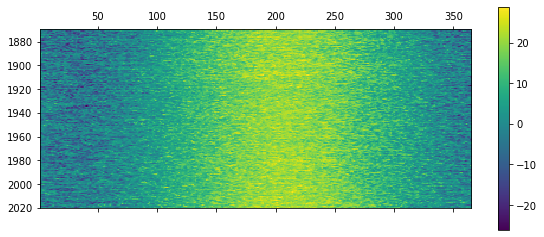

In [4]:
pp.matshow(allyears['TMIN'], extent=[1,365,2020,1869])
pp.colorbar()

In [5]:
tmin_record = np.array([np.nanmin(allyears['TMIN'][i], axis=0) for i in range(0, 2020 - 1869)], dtype = 'd')
tmax_record = np.array([np.nanmin(allyears['TMAX'][i], axis=0) for i in range(0, 2020 - 1869)], dtype = 'd')

In [6]:
[i for i in range(1869, 2021)]

[1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,

In [7]:
normal = np.vstack([getweather.getyear('NEW YORK', ['TMIN','TMAX'], year)
                    for year in range(1945, 1956)])
np.mean(np.array([np.nanmean(normal['TMIN'][i], axis=0) for i in range(11)], dtype = 'd')), np.mean(np.array([np.nanmean(normal['TMAX'][i], axis=0) for i in range(11)], dtype = 'd'))

(8.493997509339975, 17.171581569115816)

In [8]:
np.array([np.nanmean(allyears['TMIN'][i]) for i in range(2020 - 1869)], dtype = 'd')

array([ 7.93854749,  8.40547945,  6.58712329,  6.60767123,  6.46      ,
        6.49972603,  5.83315068,  7.40219178,  7.82219178,  8.39342466,
        7.2569863 ,  7.65013699,  7.34465753,  7.33972603,  6.28739726,
        7.56438356,  6.45945205,  6.64958904,  6.48821918,  5.72876712,
        7.84246575,  7.80328767,  8.50191781,  7.50575342,  6.62328767,
        7.99342466,  7.73643836,  8.25506849,  8.34767123,  9.38520548,
        8.57561644,  8.46575342,  7.93287671,  8.16767123,  8.17890411,
        6.80465753,  8.37808219,  9.25835616,  8.13013699,  9.44054795,
        8.65917808,  8.64657534,  8.22630137,  7.32630137,  8.50027397,
        6.86054795,  7.77890411,  7.19123288,  6.37260274,  7.49863014,
        8.05013699,  6.65287671,  8.07068493,  7.55589041,  7.12054795,
        6.6909589 ,  7.50054795,  6.41287671,  7.75232877,  7.97753425,
        7.99835616,  8.34849315,  9.04246575,  8.61178082,  8.20821918,
        7.40136986,  7.44246575,  7.55452055,  8.3260274 ,  8.66

In [9]:
len(range(1945, 1956))

11

In [28]:
def plot_anomaly(station):
    years = range(1869, 2021)
    midcentury = range(1945, 1956)

    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in years])

    normal = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                        for year in midcentury])

    allyears_avg = np.array([(np.nanmean(allyears['TMIN'][i]), np.nanmean(allyears['TMAX'][i])) for i in range(len(years))],
                            dtype = [('tmin', 'd'), ('tmax', 'd')])

    midcentury_avg = 0.5 * (np.mean(np.array([np.nanmean(normal['TMIN'][i], axis=0) for i in range(len(midcentury))], dtype = 'd'))
                            + np.mean(np.array([np.nanmean(normal['TMAX'][i], axis=0) for i in range(len(midcentury))], dtype = 'd')))

    temp_anomaly = [0.5 * (tmin + tmax) - midcentury_avg for tmin, tmax in allyears_avg]

    pp.plot(years[5:-5], smooth(temp_anomaly, 11, 'valid'))

/home/dlu/anaconda3/envs/conda-forge/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/home/dlu/anaconda3/envs/conda-forge/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


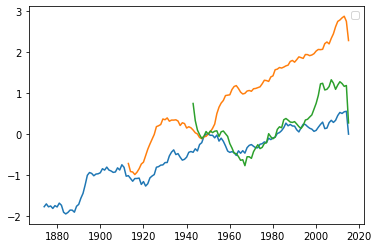

In [29]:
plot_anomaly('NEW YORK')
plot_anomaly('PASADENA')
plot_anomaly('MINNEAPOLIS')

pp.legend()